# Introduction

In October 2015, a data journalist called Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest.  His analysis was published in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/). Since this analysis was conducted several years ago, the aim of this project will be to analyse more recent movie ratings data to determine whether there's been a change in Fandango's rating system after Hickey's analysis.

**Reading and exploring the data**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [4]:
before.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
after.head(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


As we're only interested in exploring Fandango movie ratings, we'll isolate the relevant columns from both datasets

In [7]:
before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
before.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [8]:
after = after[['movie', 'year', 'fandango']]
after.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our population of interest for the project is the entire list of movies, regardless of the year they were realeased in.  So we will aim to sample data from both the before and after dataframes to see whether there has been a change in Fandango's rating system.

The [sampling criteria](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) for the before dataframe was any film which had a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. This is certainly not random sampling - some films had no chance to be included since they did not fulfill these criteria. Additionally, the movie must have had tickets on sale in 2015.

The [sampling criteria](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) for the after dataframe was just any sufficiently popular film released in 2016 or 2017.  This differs from the data before as both of the individuals who collected this data had different questions in mind to answer.

Another factor to consider is that the both samples are subject to temporal trends as they only feature films from certain years - this is unlikely to be representative of the population of our interest.

** Changing the goal of our analysis**

Since collecting new data is very difficult at this moment in time, the more prudent option would be to change the goal of our analysis.  Instead of determining whether the rating system has changed since Hickey's analysis, we will instead compare **movie ratings for popular movies released in 2015 with those released in 2016.**

Since the term 'popular' is vague, let's just use Hickey's previous criteria of at least 30 film reviews on Fandango

**Isolating our Data**

Since the after dataset doesn't contain information about the number of votes, let's sample some of the data and compare with the ratings on Fandango's site.

In [11]:
after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Here are the movies which were sampled, and below are Fandango's actual ratings as of February 2021

|Movie                                    |Rating  |
|-----------------------------------------|--------|
|Mechanic:Resurrection                    |25638   |                                                 
|Warcraft                                 |31648   |
|Max Steel                                |6847    |
|Me Before You                            |30720   |
|Fantastic Beasts and Where to Find Them  |88057   |
|Cell                                     |3850    |
|Genius                                   |297     |
|Sully                                    |48593   |
|A Hologram for the King                  |10241   |
|Captain America: Civil War               |180351  |
------------------------------------------------------




We can see that all of the samples satisfied the criteria, therefore we can be reasonably confident we can use this data going forward.

We should now isolate the films which were released in 2015 and 2016 into separate datasets.

In [13]:
fandango_before = before[before['FILM'].str.contains('2015')]
fandango_before.shape

(129, 5)

In [14]:
fandango_after = after[after['year'] == 2016]
fandango_after.shape

(191, 3)

We can see that in Hickey's dataset there are 129 films released in 2015, and the other dataset contains 191 films released in 2016. These are the datasets we'll use to perform our analysis

**Comparing Distribution Shapes for 2015 and 2016**

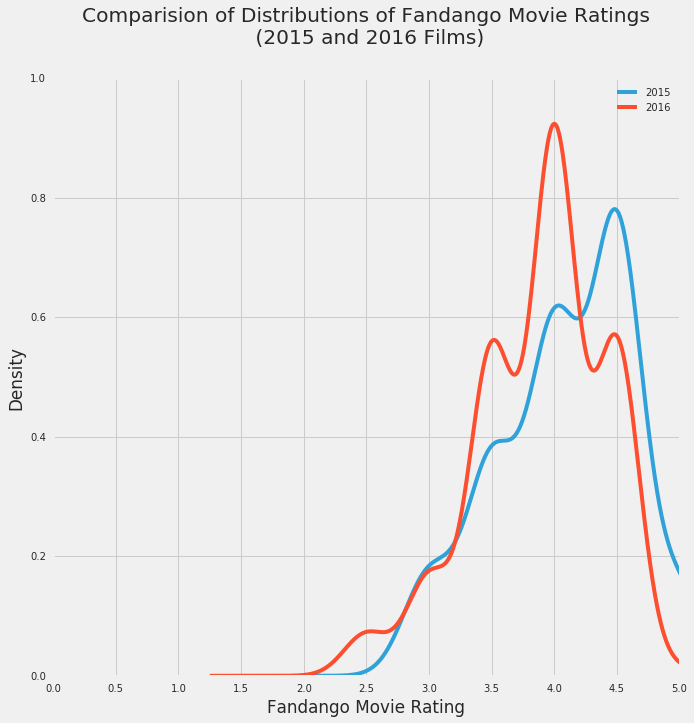

In [26]:


plt.style.use('fivethirtyeight')
fandango_before['Fandango_Stars'].plot.kde(label = 2015, legend = True, figsize=(10,10))
fandango_after['fandango'].plot.kde(label = 2016, legend = True)

plt.xlim(0, 5)
plt.xlabel('Fandango Movie Rating')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.title('Comparision of Distributions of Fandango Movie Ratings\n (2015 and 2016 Films)', y=1.05)


Both distributions are skewed to the right here, with most of the data appearing at a rating of 3.5 or higher.  The difference between the two distributions is that the number of 4.5 and 5 star reviews seems higher in the 2015 dataset than the 2016 dataset.  The 2016 dataset generally had lower rated films, with the highest proportion being 4 stars, whereas in the 2015 dataset it was 4.5.  This does seem to indicate the Fandango ratings have changed from 2015 going to 2016.

**Comparing Relative Distribution Frequencies**

We'll continue this analysis by looking at more granular information.  Since the datasets are of different sizes, we'll normalise them and look at the relative percentages.

In [31]:
print(2015)
fandango_before['Fandango_Stars'].value_counts(normalize=True) * 100

2015


4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [30]:
print(2016)
fandango_after['fandango'].value_counts(normalize=True) * 100

2016


4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64

This confirms our analysis previously - nearly 38% of films received a 4.5 star rating on Fandango in 2015, however this number drops to 24.6% in 2016.  4 star rated films increased  by almost 12%, and 3.5 star films increased by around 6%.  Additionally, the proportion of 5 star films has dropped significantly, from 7% to around 0.5%

**Comparing Summary Statistics**

Let's compute some summary statistics to get a more precise picture about the direction of the change.

In [37]:
before_mean = fandango_before['Fandango_Stars'].mean()
before_median = fandango_before['Fandango_Stars'].median()
before_mode = fandango_before['Fandango_Stars'].mode()[0]

after_mean = fandango_after['fandango'].mean()
after_median = fandango_after['fandango'].median()
after_mode = fandango_after['fandango'].mode()[0]

In [38]:
summary = pd.DataFrame()
summary['2015'] = [before_mean, before_median, before_mode]
summary['2016'] = [after_mean, after_median, after_mode]
summary.index = ['Mean', 'Median', 'Mode']
summary

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


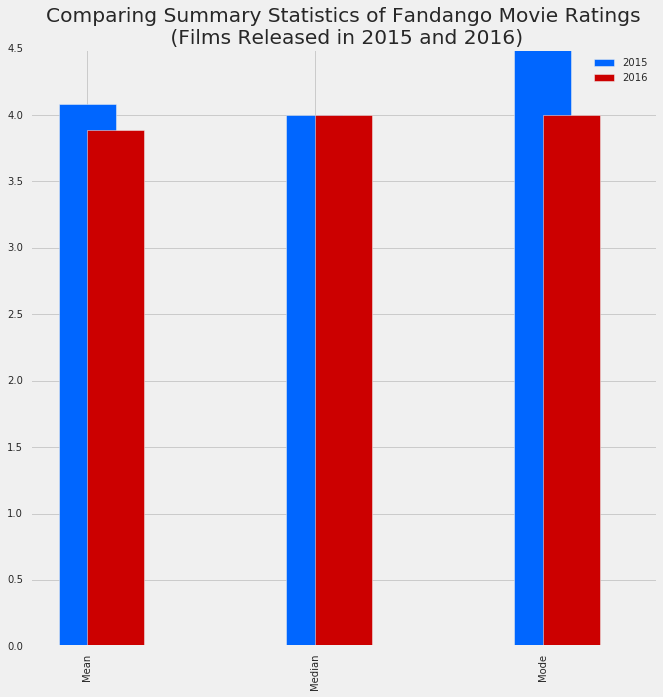

In [59]:
plt.style.use('fivethirtyeight')

summary['2015'].plot.bar(color = '#0066FF', label=2015, figsize=(10,10), align='center', width=0.25)
summary['2016'].plot.bar(color = '#CC0000', label=2016, width=0.25, align='edge')

plt.title('Comparing Summary Statistics of Fandango Movie Ratings\n (Films Released in 2015 and 2016)')
plt.legend()

We can see that the mean decreased going from 2015 to 2016, which does indicate there are more films with lower ratings now.  Additionally, the mode went from 4.5 to 4 which indicates the most common rating is 4 stars, instead of 4.5

**Conclusion**
The analysis has showed that there is a slight difference between Fandango's movie ratings in 2015 and the ratings in 2016.  We determined that on average, popular movies released in 2016 were rated lower than popular movies released in 2